In [1]:
pip install pandas sqlalchemy pymysql


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

sales_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Sales.csv", encoding='ISO-8859-1')
products_df = pd.read_csv(r"D:\PROJECTS\EDA\DATA'S\Products.csv", encoding='ISO-8859-1')

# HANDLING MISSSING VALUES
print(sales_df.isnull().sum())


Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64


In [3]:
Missing_values = sales_df['Delivery Date'].fillna('Unknown')
print(Missing_values.isnull().sum())

0


In [4]:
# Check data types of each column
print(sales_df.dtypes)

Order Number      int64
Line Item         int64
Order Date       object
Delivery Date    object
CustomerKey       int64
StoreKey          int64
ProductKey        int64
Quantity          int64
Currency Code    object
dtype: object


In [5]:
# Convert Order Date to datetime
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], errors='coerce')

# Convert Delivery Date to datetime, replacing 'Unknown' with NaT for consistency
sales_df['Delivery Date'] = pd.to_datetime(sales_df['Delivery Date'], errors='coerce')

# Check the updated data types
print(sales_df.dtypes)


Order Number              int64
Line Item                 int64
Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
CustomerKey               int64
StoreKey                  int64
ProductKey                int64
Quantity                  int64
Currency Code            object
dtype: object


In [6]:
# Check for duplicates
duplicates = sales_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    sales_df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [7]:
# Example merge with products_df
merged_sales_data = pd.merge(sales_df, products_df, left_on='ProductKey', right_on='ProductKey', how='left')
print(merged_sales_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    62884 non-null  int64         
 1   Line Item       62884 non-null  int64         
 2   Order Date      62884 non-null  datetime64[ns]
 3   Delivery Date   13165 non-null  datetime64[ns]
 4   CustomerKey     62884 non-null  int64         
 5   StoreKey        62884 non-null  int64         
 6   ProductKey      62884 non-null  int64         
 7   Quantity        62884 non-null  int64         
 8   Currency Code   62884 non-null  object        
 9   Product Name    62884 non-null  object        
 10  Brand           62884 non-null  object        
 11  Color           62884 non-null  object        
 12  Unit Cost USD   62884 non-null  object        
 13  Unit Price USD  62884 non-null  object        
 14  SubcategoryKey  62884 non-null  int64         
 15  Su

In [8]:
merged_sales_data.isnull().sum()

Order Number          0
Line Item             0
Order Date            0
Delivery Date     49719
CustomerKey           0
StoreKey              0
ProductKey            0
Quantity              0
Currency Code         0
Product Name          0
Brand                 0
Color                 0
Unit Cost USD         0
Unit Price USD        0
SubcategoryKey        0
Subcategory           0
CategoryKey           0
Category              0
dtype: int64

In [9]:
merged_sales_data['Delivery Date'].fillna('Not Delivered', inplace=True)
merged_sales_data.isnull().sum()

Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
CustomerKey       0
StoreKey          0
ProductKey        0
Quantity          0
Currency Code     0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

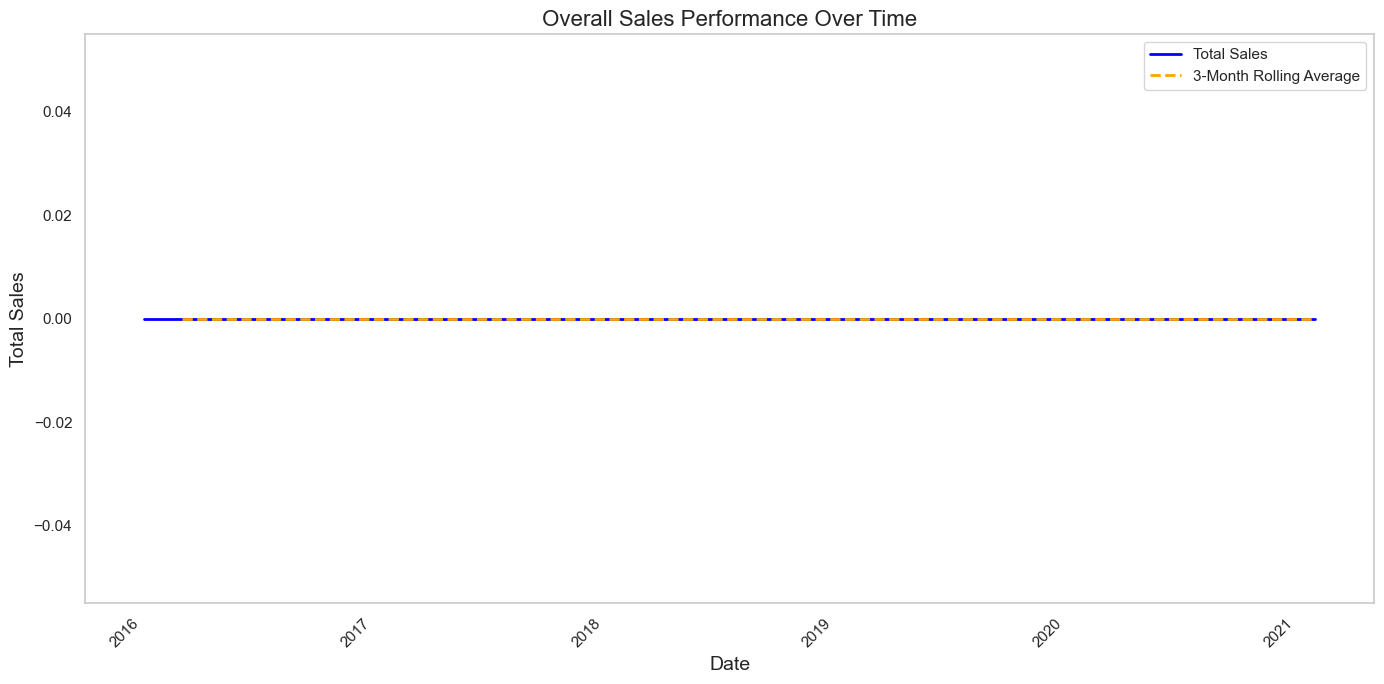

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_sales_data is your DataFrame with sales data

# Ensure necessary columns are in numeric format
merged_sales_data['Quantity'] = pd.to_numeric(merged_sales_data['Quantity'], errors='coerce')
merged_sales_data['Unit Price USD'] = pd.to_numeric(merged_sales_data['Unit Price USD'], errors='coerce')

# Calculate total sales
merged_sales_data['Total Sales'] = merged_sales_data['Quantity'] * merged_sales_data['Unit Price USD']

# Ensure 'Order Date' is a datetime object
merged_sales_data['Order Date'] = pd.to_datetime(merged_sales_data['Order Date'])

# Aggregate sales by month
monthly_sales = merged_sales_data.resample('M', on='Order Date')['Total Sales'].sum().reset_index()

# Calculate a rolling average (optional)
monthly_sales['Rolling Average'] = monthly_sales['Total Sales'].rolling(window=3).mean()

# Create an enhanced plot
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Plot total sales
sns.lineplot(x='Order Date', y='Total Sales', data=monthly_sales, label='Total Sales', color='blue', linewidth=2)

# Plot rolling average
sns.lineplot(x='Order Date', y='Rolling Average', data=monthly_sales, label='3-Month Rolling Average', color='orange', linewidth=2, linestyle='--')

# Fill area under the total sales line
plt.fill_between(monthly_sales['Order Date'], monthly_sales['Total Sales'], color='blue', alpha=0.2)

# Add titles and labels
plt.title('Overall Sales Performance Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


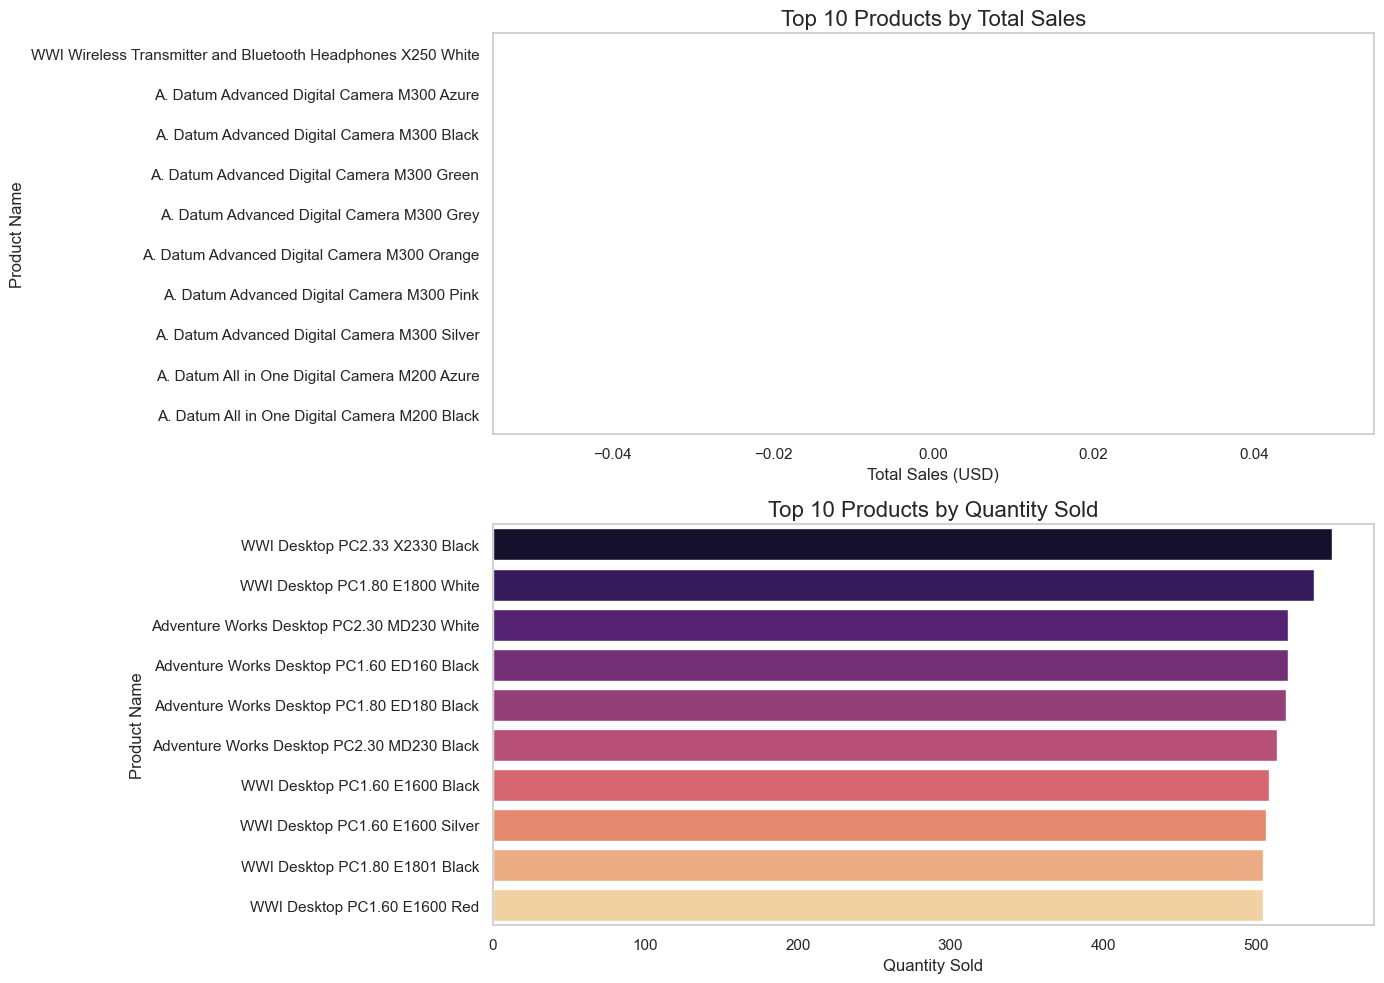

In [11]:
# Sales by Product:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_sales_data is your DataFrame with sales data

# Ensure necessary columns are in numeric format
merged_sales_data['Quantity'] = pd.to_numeric(merged_sales_data['Quantity'], errors='coerce')
merged_sales_data['Unit Price USD'] = pd.to_numeric(merged_sales_data['Unit Price USD'], errors='coerce')

# Calculate total sales if not already done
merged_sales_data['Total Sales'] = merged_sales_data['Quantity'] * merged_sales_data['Unit Price USD']

# Group by product and calculate total sales and quantity
product_sales = merged_sales_data.groupby('Product Name').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Sort products by total sales and quantity
top_products_by_sales = product_sales.sort_values(by='Total Sales', ascending=False).head(10)
top_products_by_quantity = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Set up the figure for two subplots
plt.figure(figsize=(14, 10))

# Plot for Total Sales
plt.subplot(2, 1, 1)
sns.barplot(x='Total Sales', y='Product Name', data=top_products_by_sales, palette='viridis')
plt.title('Top 10 Products by Total Sales', fontsize=16)
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x')

# Plot for Quantity Sold
plt.subplot(2, 1, 2)
sns.barplot(x='Quantity', y='Product Name', data=top_products_by_quantity, palette='magma')
plt.title('Top 10 Products by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()


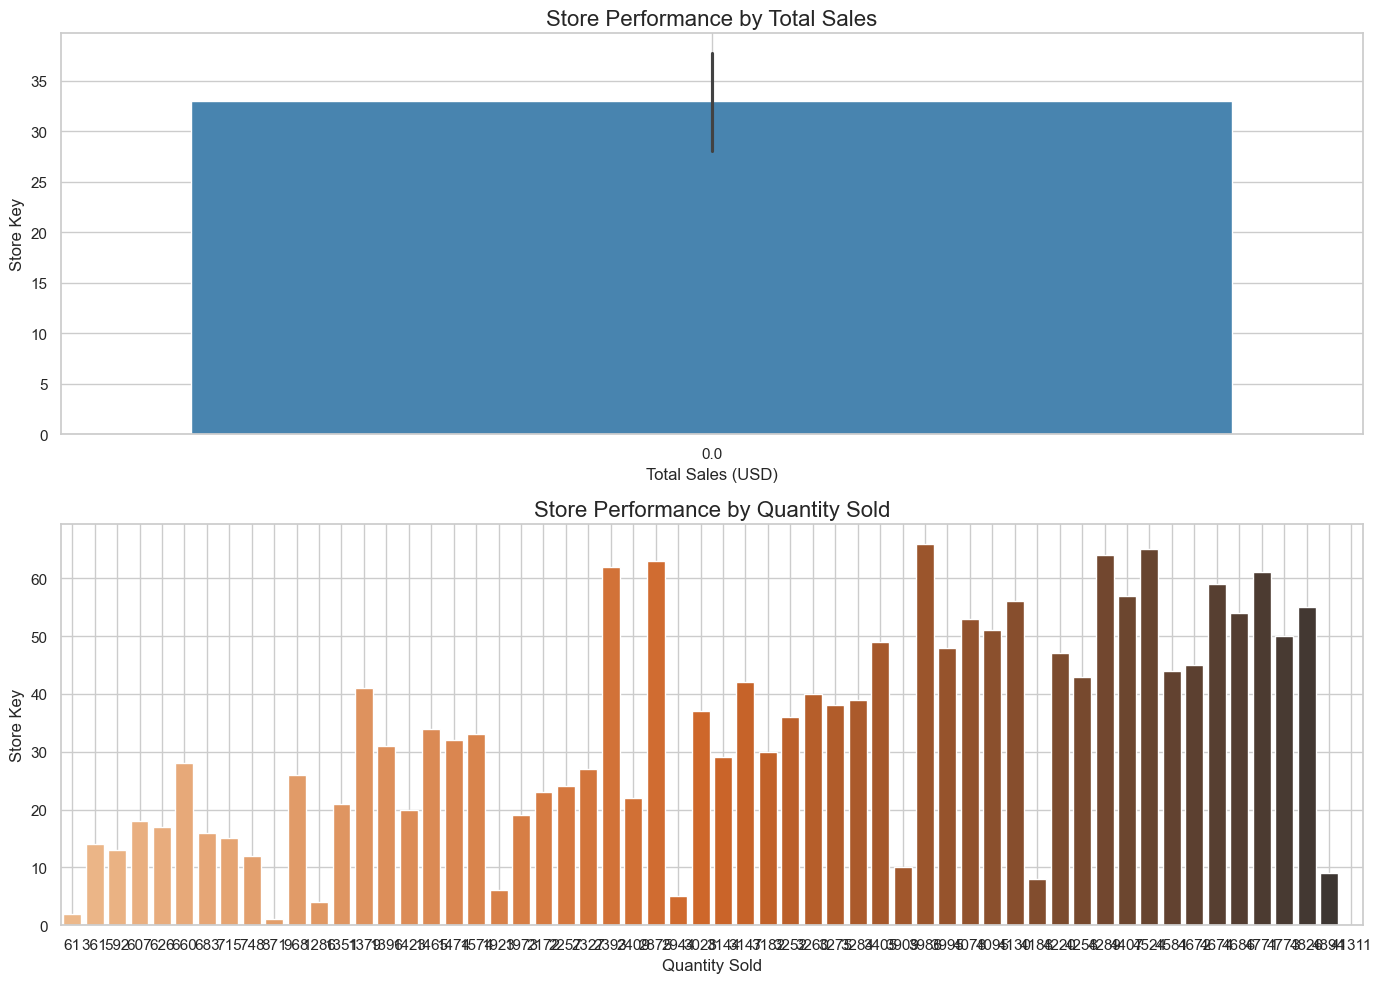

In [12]:
# 3 Sales by Store Code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_sales_data is your DataFrame with sales data

# Ensure necessary columns are in numeric format
merged_sales_data['Quantity'] = pd.to_numeric(merged_sales_data['Quantity'], errors='coerce')
merged_sales_data['Unit Price USD'] = pd.to_numeric(merged_sales_data['Unit Price USD'], errors='coerce')

# Calculate total sales if not already done
merged_sales_data['Total Sales'] = merged_sales_data['Quantity'] * merged_sales_data['Unit Price USD']

# Group by store and calculate total sales and quantity
store_sales = merged_sales_data.groupby('StoreKey').agg({
    'Total Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Sort stores by total sales and quantity
store_sales = store_sales.sort_values(by='Total Sales', ascending=False)

# Set up the figure for two subplots
plt.figure(figsize=(14, 10))

# Plot for Total Sales by Store
plt.subplot(2, 1, 1)
sns.barplot(x='Total Sales', y='StoreKey', data=store_sales, palette='Blues_d')
plt.title('Store Performance by Total Sales', fontsize=16)
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('Store Key', fontsize=12)
plt.grid(axis='x')

# Plot for Quantity Sold by Store
plt.subplot(2, 1, 2)
sns.barplot(x='Quantity', y='StoreKey', data=store_sales, palette='Oranges_d')
plt.title('Store Performance by Quantity Sold', fontsize=16)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Store Key', fontsize=12)
plt.grid(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()


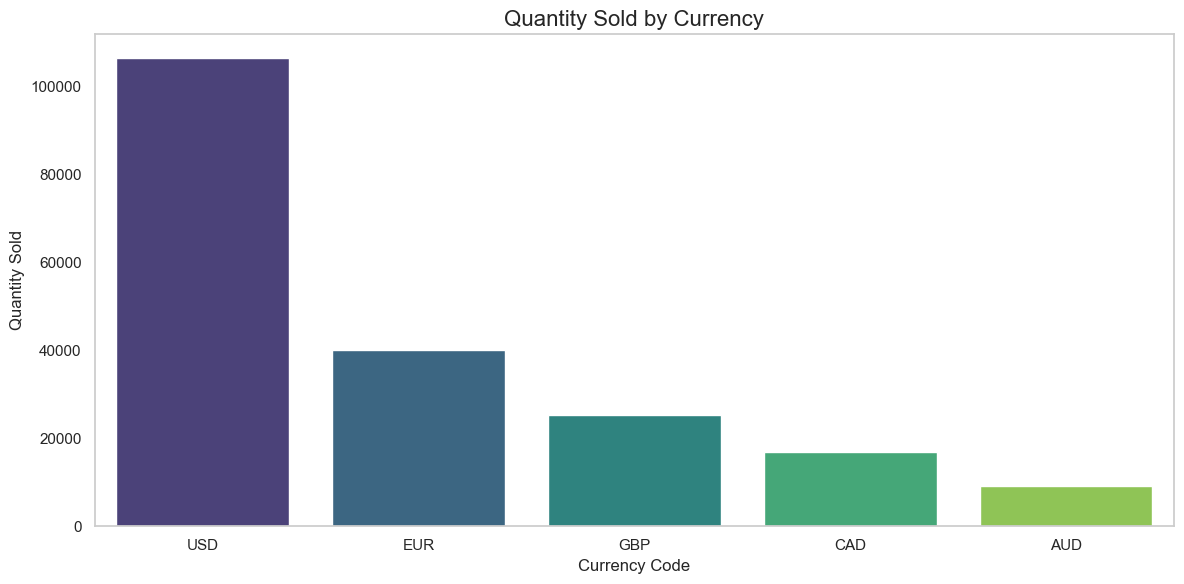

  Currency Code  Quantity
4           USD    106407
2           EUR     40050
3           GBP     25298
1           CAD     16793
0           AUD      9209


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_sales_data is your DataFrame with sales data

# Ensure necessary columns are in numeric format
merged_sales_data['Quantity'] = pd.to_numeric(merged_sales_data['Quantity'], errors='coerce')

# Group by currency and calculate total quantity
currency_quantity = merged_sales_data.groupby('Currency Code').agg({
    'Quantity': 'sum'
}).reset_index()

# Sort by quantity
currency_quantity = currency_quantity.sort_values(by='Quantity', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Currency Code', y='Quantity', data=currency_quantity, palette='viridis')
plt.title('Quantity Sold by Currency', fontsize=16)
plt.xlabel('Currency Code', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Print currency quantity for reference
print(currency_quantity)


In [14]:
import pandas as pd

# Assuming merged_sales_data is your final DataFrame
output_path = r"D:\PROJECTS\EDA\Cleanned Data\sales_analysis.csv"

# Save the DataFrame to an Excel file
merged_sales_data.to_csv(output_path, index=False)


In [15]:
merged_sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Total Sales
0,366000,1,2016-01-01,Not Delivered,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,$31.27,NaN,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,NaN
1,366001,1,2016-01-01,2016-01-13 00:00:00,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,NaN,402,Digital SLR Cameras,4,Cameras and camcorders,NaN
2,366001,2,2016-01-01,2016-01-13 00:00:00,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,NaN,803,Microwaves,8,Home Appliances,NaN
3,366002,1,2016-01-01,2016-01-12 00:00:00,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,NaN,402,Digital SLR Cameras,4,Cameras and camcorders,NaN
4,366002,2,2016-01-01,2016-01-12 00:00:00,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,NaN,301,Laptops,3,Computers,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,Not Delivered,1216913,43,632,3,USD,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,NaN,305,Projectors & Screens,3,Computers,NaN
62880,2243031,1,2021-02-20,2021-02-24 00:00:00,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,NaN,106,Bluetooth Headphones,1,Audio,NaN
62881,2243032,1,2021-02-20,2021-02-23 00:00:00,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,NaN,602,Movie DVD,6,"Music, Movies and Audio Books",NaN
62882,2243032,2,2021-02-20,2021-02-23 00:00:00,331277,0,1717,2,CAD,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,NaN,702,Download Games,7,Games and Toys,NaN


In [16]:
import pandas as pd
from sqlalchemy import create_engine

# Database connection details
user = 'root'
password = 'Krishna3_6_9'
host = '127.0.0.1'
database = 'Datas'

# Create a connection string
connection_string = f'mysql+pymysql://{user}:{password}@{host}/{database}'

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Store the DataFrame in the MySQL database
merged_sales_data.to_sql('sales_analysis', con=engine, index=False, if_exists='replace')  # 'replace' can be changed to 'append' if needed

print("Data stored in MySQL successfully.")


Data stored in MySQL successfully.


In [17]:
merged_sales_data.dtypes

Order Number               int64
Line Item                  int64
Order Date        datetime64[ns]
Delivery Date             object
CustomerKey                int64
StoreKey                   int64
ProductKey                 int64
Quantity                   int64
Currency Code             object
Product Name              object
Brand                     object
Color                     object
Unit Cost USD             object
Unit Price USD           float64
SubcategoryKey             int64
Subcategory               object
CategoryKey                int64
Category                  object
Total Sales              float64
dtype: object